# Deep Learning Final Project

Submitted by: Albert Khayat - 212747026, David Afik - 318267721

# Setup

### Imports

In [1]:
import torch

from collections import namedtuple	# for parameters

from model.MainModel import Painter
from data import ImagesDataset


### Configurations

In [2]:
print(f"CUDA version: {torch.version.cuda}")

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Name of current CUDA device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    device = torch.device('cpu')
    print('Running on CPU')

CUDA version: 12.1
Name of current CUDA device: NVIDIA GeForce RTX 3060 Laptop GPU


### Load Data

In [3]:
DATA_PATH = "data\\food"

TRAIN_SIZE = 10000
TEST_SIZE = 1000

BATCH_SIZE_TRAIN = 20
BATCH_SIZE_TEST = 20

SPLIT_SEED = 12345

# Get dataset
train_data, test_data = ImagesDataset.create_datasets(DATA_PATH, TRAIN_SIZE, TEST_SIZE, SPLIT_SEED, device)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE_TRAIN, shuffle=True, pin_memory=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE_TEST, shuffle=True, pin_memory=False)

# Train Model

In [4]:
# Training parameters
MODEL_NAME = "ttt"		# Used for save path
PRE_TRAIN = True		# if True, pre-trains generator
LOAD = False				# if True, loads model with model_name before train
LOAD_PRETRAIN = False	# if True, loads pre-train data
SAVE_MODEL = False		# if True, saves model every epoch

NUM_EPOCHS = 30
PRE_EPOCHS = 2

In [5]:
# model parameters
Hyparams = namedtuple('Hyperparameters', ['lr_d','lr_g','lr_pre'])

hyparams = Hyparams(1e-3, 1e-3, 1e-4)

# Create model
model = Painter(MODEL_NAME, hyparams, LOAD, LOAD_PRETRAIN, device)

print(f"Number of parameters: {model.count_parameters()}")

Number of parameters: 7980330


Epoch 21/25


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/50 [00:00<?, ?it/s]

Generator test loss: 0.062292


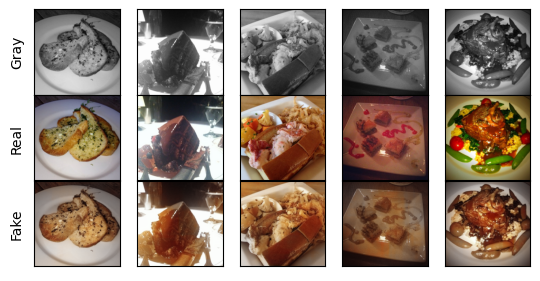

Epoch 22/25


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/50 [00:00<?, ?it/s]

Generator test loss: 0.061987


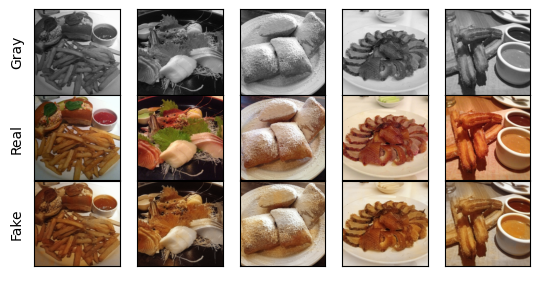

Epoch 23/25


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/50 [00:00<?, ?it/s]

Generator test loss: 0.061873


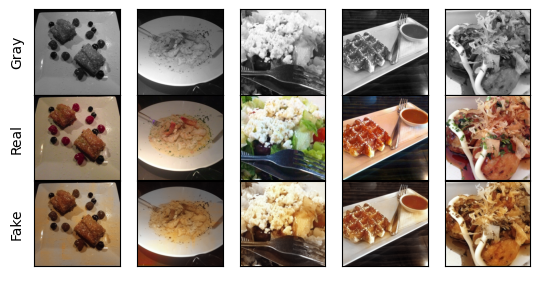

Epoch 24/25


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/50 [00:00<?, ?it/s]

Generator test loss: 0.061619


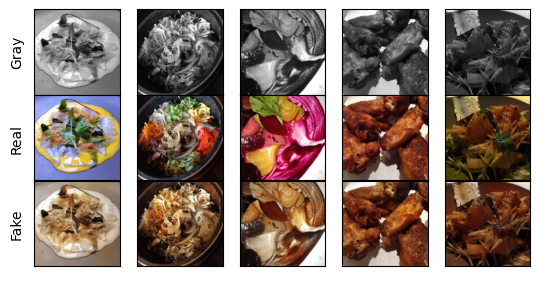

Epoch 25/25


Train:   0%|          | 0/500 [00:00<?, ?it/s]

Test:   0%|          | 0/50 [00:00<?, ?it/s]

Generator test loss: 0.062341


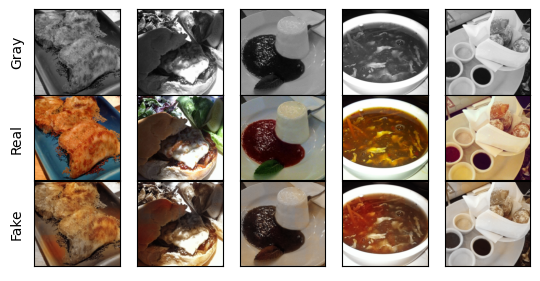

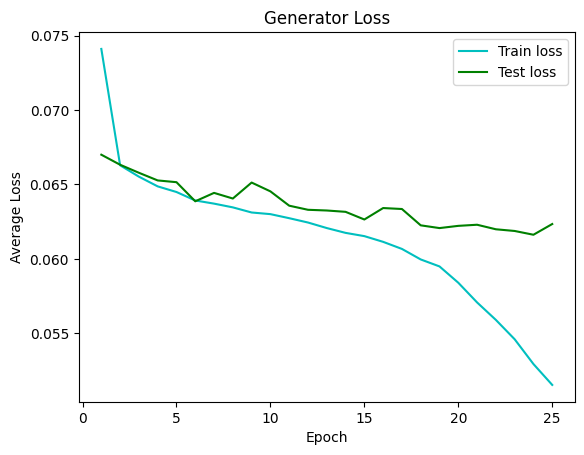

In [6]:
if PRE_TRAIN:
	# Pre-train generator
	for e in range(PRE_EPOCHS):
		print(f"Epoch {model.logger.epochs_pretrained+1}/{PRE_EPOCHS + model.logger.epochs_pretrained - e}")

		train_loss = model.pretrain_generator(train_loader)
		test_loss = model.test_model(test_loader, pretrain=True)
		
		print(f"Generator test loss: {test_loss:.6f}")
		model.logger.plot_coloring()

		model.logger.after_pretrain(train_loss, test_loss)

		if SAVE_MODEL: model.save(pretrain=True)

model.logger.plot_performence(pretrain=True)

In [ ]:
# Train model
for e in range(NUM_EPOCHS):
	print(f"Training epoch {model.logger.epochs_trained+1}/{NUM_EPOCHS + model.logger.epochs_trained - e}")

	train_loss = model.train_model(train_loader)
	test_loss = model.test_model(test_loader)

	# Show loss and coloring after epoch
	print(f"Test - Discriminator loss: {test_loss[1]:.6f},  Generator loss: {test_loss[0]:.6f}")
	model.logger.plot_coloring()

	model.logger.after_epoch(train_loss, test_loss)	# add loss to logger

	if SAVE_MODEL: model.save()

model.logger.plot_performence()

# Test Model

In [ ]:
# If set to None, tests model from the prevous code blocks
model_name = None

if model_name is not None: model = Painter(model_name, load=True, device=device)

In [ ]:
model.test_model(test_loader)
model.logger.plot_coloring()